In [1]:
#say no to warnings!
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img,array_to_img,img_to_array

# IMMAGINE

In [3]:
#serve avere immagine cat.jpg nella cartella del notebook!

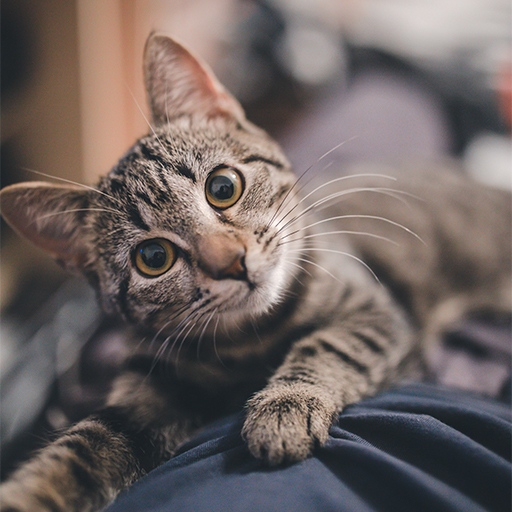

In [4]:
img = load_img('cat.jpg')
img

In [5]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [6]:
img_to_array(img).shape

(512, 512, 3)

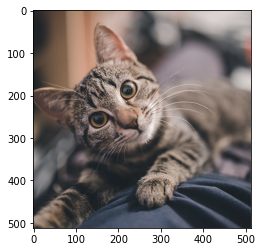

In [7]:
plt.imshow(img_to_array(img)/255);

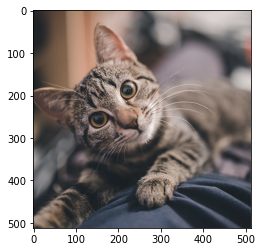

In [8]:
np_cat = np.array(load_img('cat.jpg'))/255
plt.imshow(np_cat);

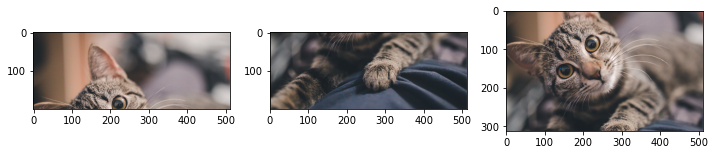

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(np_cat[:200]);
plt.subplot(1,3,2)
plt.imshow(np_cat[-200:]);
plt.subplot(1,3,3)
plt.imshow(np_cat[100:-100]);

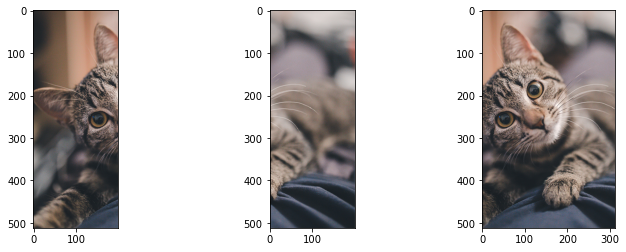

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(np_cat[:,:200]);
plt.subplot(1,3,2)
plt.imshow(np_cat[:,-200:]);
plt.subplot(1,3,3)
plt.imshow(np_cat[:,100:-100]);

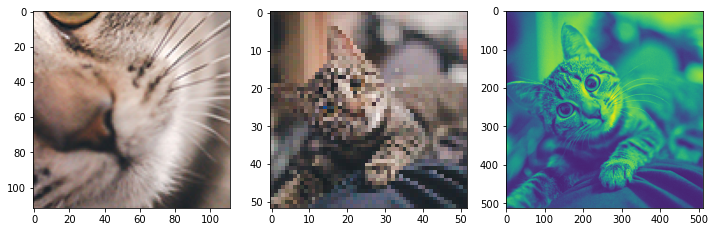

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(np_cat[200:-200,200:-200]);
plt.subplot(1,3,2)
plt.imshow(np_cat[::10,::10]);
plt.subplot(1,3,3)
plt.imshow(np_cat[:,:,:1]);

# MODELLO

In [12]:
[x for x in dir(tf.keras.applications) if not x.startswith('_')]

['DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 'densenet',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'nasnet',
 'resnet',
 'resnet50',
 'resnet_v2',
 'vgg16',
 'vgg19',
 'xception']

In [13]:
trained_model = tf.keras.applications.MobileNetV2()

In [14]:
trained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

# PROVE ED ERRORI

In [15]:
#trained_model.predict(np_cat)

In [16]:
predictable_cat = np.expand_dims(load_img('cat.jpg',target_size=(224,224,3)),0)
predictable_cat.shape

(1, 224, 224, 3)

In [17]:
prediction = trained_model.predict(predictable_cat);

In [18]:
prediction.shape

(1, 1000)

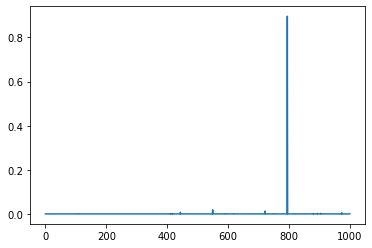

In [19]:
plt.plot(prediction[0])

In [20]:
print(sum(prediction[0]),max(prediction[0]))

0.9999999664548511 0.8963587


In [21]:
np.argmax(prediction[0])

794

In [22]:
dir(tf.keras.applications.mobilenet_v2)

['MobileNetV2',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'decode_predictions',
 'preprocess_input']

In [23]:
tf.keras.applications.mobilenet_v2.decode_predictions(prediction)

[[('n04209239', 'shower_curtain', 0.8963587),
  ('n03291819', 'envelope', 0.01850532),
  ('n03938244', 'pillow', 0.013170242),
  ('n02834397', 'bib', 0.0077088145),
  ('n09256479', 'coral_reef', 0.0050242697)]]

In [24]:
preprocessed_cat = tf.keras.applications.mobilenet_v2.preprocess_input(predictable_cat)
preprocessed_cat.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


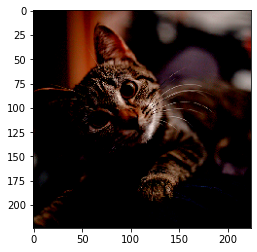

In [25]:
plt.imshow(preprocessed_cat[0]);

In [26]:
prediction = trained_model.predict(preprocessed_cat)
tf.keras.applications.mobilenet_v2.decode_predictions(prediction)

[[('n02123159', 'tiger_cat', 0.4905659),
  ('n02123045', 'tabby', 0.36186516),
  ('n02124075', 'Egyptian_cat', 0.10469872),
  ('n02127052', 'lynx', 0.0036678948),
  ('n03942813', 'ping-pong_ball', 0.0020215937)]]

# PIPELINE DI PREDIZIONE

In [27]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input,decode_predictions

In [28]:
def pretrained_prediction(model,filename):
    image = np.expand_dims(load_img(filename,target_size=(224,224,3)),0)
    plt.imshow(image[0])
    prediction = model.predict(preprocess_input(image))
    return decode_predictions(prediction)

[[('n02099601', 'golden_retriever', 0.8685984),
  ('n02104029', 'kuvasz', 0.036024086),
  ('n04409515', 'tennis_ball', 0.009233193),
  ('n02101388', 'Brittany_spaniel', 0.007615551),
  ('n02099712', 'Labrador_retriever', 0.0070666936)]]

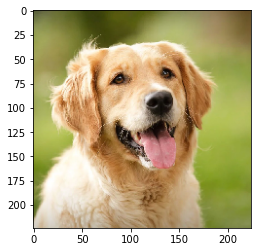

In [29]:
pretrained_prediction(trained_model,'dog.png')

# QUAL È IL LIMITE? IL TRAINING SET..

[[('n03146219', 'cuirass', 0.27166438),
  ('n02895154', 'breastplate', 0.15537642),
  ('n03379051', 'football_helmet', 0.13210875),
  ('n04254120', 'soap_dispenser', 0.05468089),
  ('n03916031', 'perfume', 0.039118532)]]

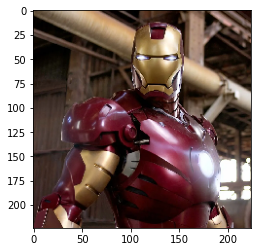

In [30]:
pretrained_prediction(trained_model,'ironman.png')